# Smoothing and blurring

I’m pretty sure we all know what blurring is. It’s what happens when your camera takes a picture out of focus. Sharper regions in the image lose their detail. The goal here is to use a low-pass filter to reduce the amount of noise and detail in an image.

Practically, this means that each pixel in the image is mixed in with its surrounding pixel intensities. This “mixture” of pixels in a neighborhood becomes our blurred pixel.

### import the necessary packages

In [2]:
import numpy as np
import cv2
from imshow import imshow

### load the image and display

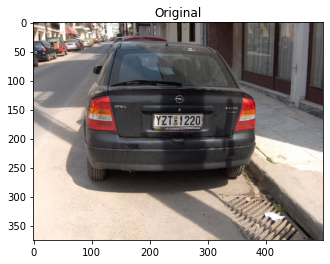

In [3]:
image = cv2.imread("image/car.png")

imshow(image, "Original")

### Averaging

The first blurring method we are going to explore is averaging.

An average filter does exactly what you think it might do — takes an area of pixels surrounding a central pixel, averages all these pixels together, and replaces the central pixel with the average.

By taking the average of the region surrounding a pixel, we are smoothing it and replacing it with the value of its local neighborhood. This allows us to reduce noise and the level of detail, simply by relying on the average.

Hence, this brings us to an important rule: as the size of the kernel increases, so will the amount in which the image is blurred.

Simply put: the larger your smoothing kernel is, the more blurred your image will look.

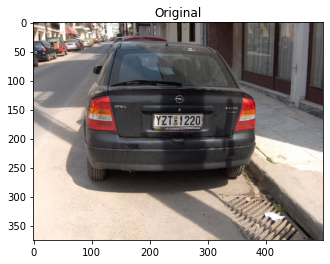

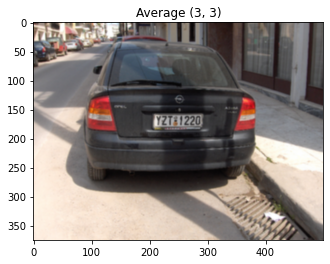

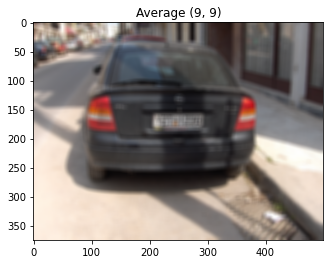

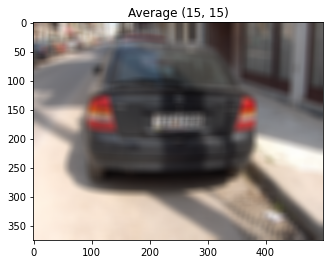

In [8]:
kernelSizes = [(3, 3), (9, 9), (15, 15)]

imshow(image, "Original")

# loop over the kernel sizes and apply an "average" blur to the image
for k in kernelSizes:
    blurred = cv2.blur(image, k)
    imshow(blurred, f"Average {k}")

### Gaussian
Next up, we are going to review Gaussian blurring. Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average. And as the name suggests, Gaussian smoothing is used to remove noise that approximately follows a Gaussian distribution.

The end result is that our image is less blurred, but more naturally blurred, than using the average method discussed in the previous section. Furthermore, based on this weighting we’ll be able to preserve more of the edges in our image as compared to average smoothing.

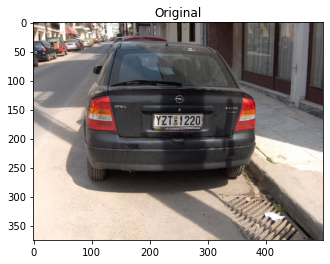

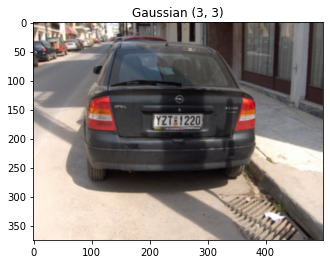

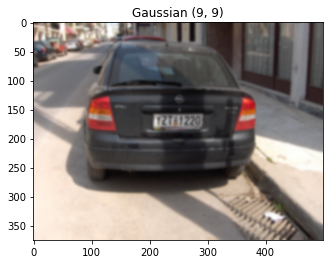

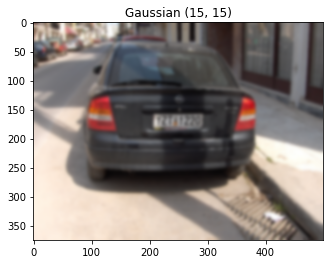

In [10]:
imshow(image, "Original")

# loop over the kernel sizes and apply a "Gaussian" blur to the image
for k in kernelSizes:
    blurred = cv2.GaussianBlur(image, k, 0)
    imshow(blurred, f"Gaussian {k}")

### Median

Traditionally, the median blur method has been most effective when removing salt-and-pepper noise. This type of noise is exactly what it sounds like: imagine taking a photograph, putting it on your dining room table, and sprinkling salt and pepper on top of it. Using the median blur method, you could remove the salt and pepper from your image.

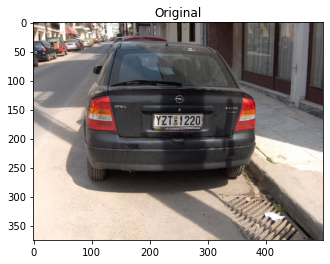

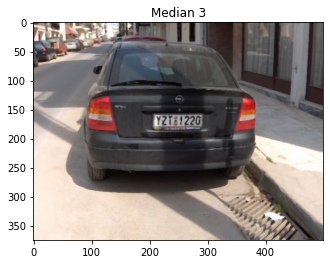

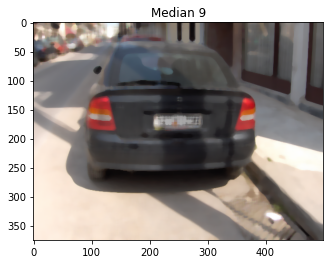

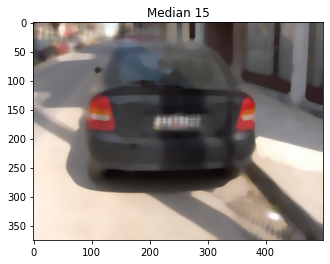

In [12]:
imshow(image, "Original")

# loop over the kernel sizes and apply a "Median" blur to the image
for k in (3, 9, 15):
    blurred = cv2.medianBlur(image, k)
    imshow(blurred, f"Median {k}")

### Bilateral

The last method we are going to explore is bilateral blurring.

Thus far, the intention of our blurring methods have been to reduce noise and detail in an image; however, as a side effect we have tended to lose edges in the image.

In order to reduce noise while still maintaining edges, we can use bilateral blurring. Bilateral blurring accomplishes this by introducing two Gaussian distributions.

The first Gaussian function only considers spatial neighbors. That is, pixels that appear close together in the (x, y)-coordinate space of the image. The second Gaussian then models the pixel intensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

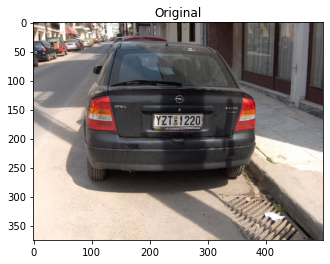

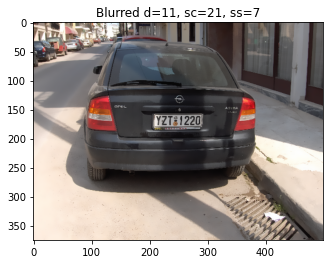

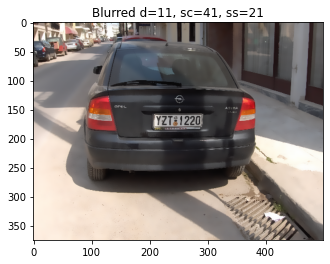

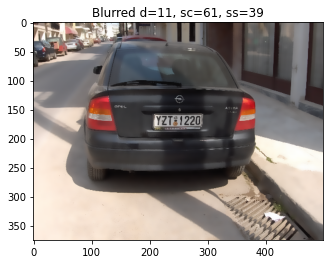

In [14]:
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

imshow(image, "Original")

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
    # apply bilateral filtering and display the image
    blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
    imshow(blurred, f"Blurred d={diameter}, sc={sigmaColor}, ss={sigmaSpace}")

We then reviewed the four primary methods to smooth an image in OpenCV: averaging, Gaussian blurring, median filtering, and bilateral filtering.

The simple average method is fast, but may not preserve edges in images.

Applying a Gaussian blur is better at preserving edges, but is slightly slower than the average method.

A median filter is primarily used to reduce salt-and-pepper style noise as the median statistic is much more robust and less sensitive to outliers than other statistical methods such as the mean.

Finally, the bilateral filter preserves edges, but is substantially slower than the other methods. Bilateral filtering also boasts the most parameters to tune which can become a nuisance to tune correctly.

In general, I recommend starting with a simple Gaussian blur to obtain a baseline and then going from there.